# Project - 2 `Boundry Layer Problem`


`Libraries`


In [133]:
import matplotlib.pyplot as plt
import numpy as np

`Grid Specifications`


In [170]:
Lx, Ly = 50.0, 1.0
Re = 1e4
U_inf = 50.0
nx, ny = 500, 250
nu = (U_inf * Lx) / Re
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
u = np.ones((nx, ny),dtype=float)  * U_inf
v = np.zeros((nx, ny), dtype=float)

`Plotting Functions`


In [171]:
def contourPlot(x,y,u, val):
    plt.figure(figsize=(8, 6))
    plt.contourf(x,y, u.T, levels=50, cmap='jet')
    plt.colorbar(label=val)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(0, .5)
    plt.title(f'Contour Plot of {val}')
    plt.show()

In [172]:
def boundryLayerThikness(x, delta):
    plt.figure(figsize=(8, 6))
    plt.plot(x, delta, label='Numerical Solution')
    plt.plot(x, 4.91 * np.sqrt(nu * x / U_inf), label='Blasius Solution', linestyle='--')
    plt.xlabel('x(m)')
    plt.ylabel('Boundary Layer Thickness, δ(m)')
    plt.title('Boundary Layer Thickness vs. x')
    plt.grid()
    plt.legend()
    plt.show()

In [173]:
def similarity_plot(u):
    F_prime = np.zeros((nx, ny))
    eta = np.zeros((nx, ny))

    for i in range(nx):
        for j in range(ny):
            if x[i] != 0:
                eta[i, j] = y[j] * np.sqrt(U_inf / (nu * x[i]))
            F_prime[i, j] = u[i, j] / U_inf

    plt.figure(figsize=(8, 6))
    for i in range(0, nx, nx // 5):
        plt.plot(eta[i, :], F_prime[i, :], label=f'x = {x[i]:.2f} m')
    plt.xlabel(r'η')
    plt.ylabel("F'(η)")
    plt.title("Normalized Velocity Profiles vs Similarity Variable (η)")
    plt.grid(True)
    plt.legend()
    plt.show()

`Solver Used`


In [174]:
def TDMA(a, b, c, d):
    n = len(d)
    cp = np.zeros(n)
    dp = np.zeros(n)

    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]

    for i in range(1, n):
        denom = b[i] - a[i] * cp[i - 1]
        cp[i] = c[i] / denom
        dp[i] = (d[i] - a[i] * dp[i - 1]) / denom

    x = np.zeros(n)
    x[-1] = dp[-1]
    for i in range(n - 2, -1, -1):
        x[i] = dp[i] - cp[i] * x[i + 1]

    return x

1. Euler Explicit scheme


In [175]:
def EulerExplicitScheme():

    dy = Ly / (ny - 1)
    dx = 0.99 * (dy**2)/(2 *nu)

    # Boundary Conditions
    u[:, 0] = 0  # No-slip condition at the wall
    u[:, -1] = U_inf  # Inlet condition at the top edge
    v[:, 0] = 0  # No penetration at the wall (bottom)
    v[0, :] = 0  # No penetration at the leading edge

    for i in range(1, nx):
        un = u[i-1, :].copy()
        vn = v[i-1, :].copy()

        for j in range(1, ny-1):
            v[i, j] = v[i, j-1] - ((u[i-1, j] - un[j])/ (2 * dx)) * dy

            u[i, j] = un[j] + dx * (
                -v[i, j] * (un[j+1] - un[j-1]) / (2 * dy)
                + nu * (un[j+1] - 2 * un[j] + un[j-1]) / dy**2
            )
    return u, vn

In [176]:
u,vn = EulerExplicitScheme()

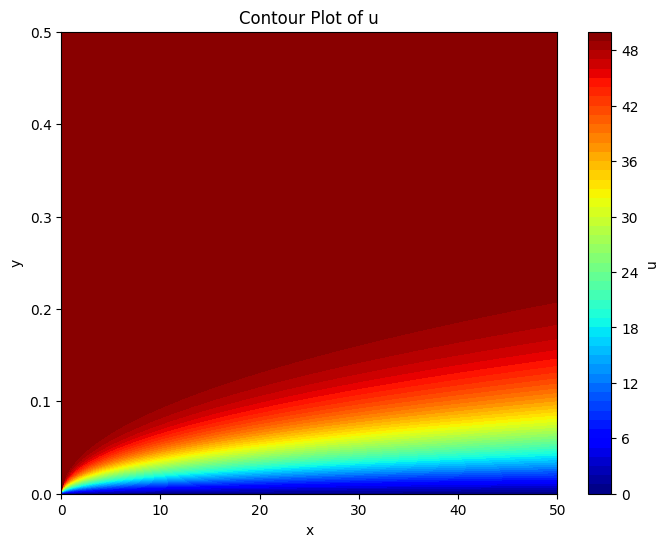

In [177]:
contourPlot(x,y,u , 'u')

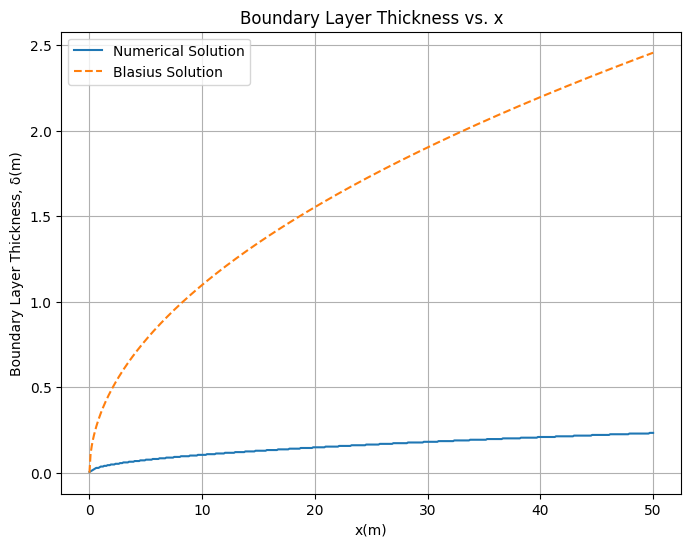

In [179]:
delta = np.zeros(nx)
for i in range(nx):
    delta_idx = np.where(u[i, :] >= 0.99 * U_inf)[0]
    if len(delta_idx) > 0:
        delta[i] = y[delta_idx[0]]
    else:
        delta[i] = Ly
boundryLayerThikness(x,delta)

2.  Euler Implicit scheme


3. Crank-Nicolson scheme


In [144]:
dy = Ly / (ny - 1)
dx = Lx / (nx - 1)

In [145]:
def Crank_Nicolson_Scheme():
    dy = Ly / (ny - 1)
    dx = Lx / (nx - 1)

    # Boundry Conditions
    

SyntaxError: incomplete input (25535247.py, line 2)